##### Copyright 2025 Google LLC.

In [66]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Getting started with Gemini 2.0

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

The new **[Google Gen AI SDK](https://github.com/googleapis/python-genai)** provides a unified interface to [Gemini 2.0](https://ai.google.dev/gemini-api/docs/models/gemini-v2) through both the [Gemini Developer API](https://ai.google.dev/gemini-api/docs) and the Gemini API on [Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/overview). With a few exceptions, code that runs on one platform will run on both. This notebook uses the Developer API.

This notebook will walk you through:

* [Installing and setting-up](Get_started.ipynb#scrollTo=Mfk6YY3G5kqp) the Google GenAI SDK
* [Text](Get_started.ipynb#scrollTo=6TYNPrNvQ8ue) and [multimodal](#scrollTo=yww-vrxmRiIy) prompting
* Counting [tokens](Get_started.ipynb#scrollTo=_9B8pb7tv_Cx)
* Setting system instructions
* Configuring [safety filters](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* Initiating a [multi-turn chat](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* [Controlling generated output](Get_started.ipynb#scrollTo=nyZMoM6tgnTA)
* Using [function calling](Get_started.ipynb#scrollTo=Rl-y9SZywD0s)
* Generating a [content stream](Get_started.ipynb#scrollTo=uQfLCxfQtPTg) and sending [asynchronous](Get_started.ipynb#scrollTo=plCtEIaHuv96) requests
* Using [file uploads](Get_started.ipynb#scrollTo=enBhuaIk3KYa)
* Using [context caching](Get_started.ipynb#scrollTo=oTgeR3_9wN5J)
* Generating [text embeddings](Get_started.ipynb#scrollTo=sXNCRn8Wx71d)

More details about this new SDK on the [documentation](https://ai.google.dev/gemini-api/docs/sdks).

## Setup

### Install SDK

Install the SDK from [PyPI](https://github.com/googleapis/python-genai).

In [67]:
%pip install -U -q 'google-genai'

### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see [Authentication](../quickstarts/Authentication.ipynb) for an example.

In [68]:
from google.colab import userdata

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

### Initialize SDK client

With the new SDK you now only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.

In [69]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GOOGLE_API_KEY)

### Choose a model

This notebook will teach you how to use the [Gemini 2.0](https://ai.google.dev/gemini-api/docs/models/gemini-v2) model with the GenAI SDK. But the SDK also work with the 1.5 generation of models.

For more information about all Gemini models, check the [documentation](https://ai.google.dev/gemini-api/docs/models/gemini) for extended information on each of them.

In [70]:
MODEL_ID = "gemini-2.0-flash" # @param ["gemini-1.5-flash-latest","gemini-2.0-flash-lite","gemini-2.0-flash","gemini-2.5-pro-exp-03-25"] {"allow-input":true, isTemplate: true}

## Send text prompts

Use the `generate_content` method to generate responses to your prompts. You can pass text directly to `generate_content`, and use the `.text` property to get the text content of the response. Note that the `.text` field will work when there's only one part in the output.

In [71]:
from IPython.display import Markdown

response = client.models.generate_content(
    model=MODEL_ID,
    contents="What's the largest planet in our solar system?"
)

Markdown(response.text)

The largest planet in our solar system is **Jupiter**.


## Count tokens

You can use the `count_tokens` method to calculate the number of input tokens before sending a request to the Gemini API.

In [72]:
response = client.models.count_tokens(
    model=MODEL_ID,
    contents="What's the highest mountain in Africa?",
)

print(response)

total_tokens=10 cached_content_token_count=None


## Send multimodal prompts

Use Gemini 2.0 model (`gemini-2.0-flash-exp`), a multimodal model that supports multimodal prompts. You can include text, [PDF documents](../quickstarts/PDF_Files.ipynb), images, [audio](../quickstarts/Audio.ipynb) and [video](../quickstarts/Video.ipynb) in your prompt requests and get text or code responses.

In [73]:
import requests
import pathlib
from PIL import Image

IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png" # @param {type: "string"}

img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

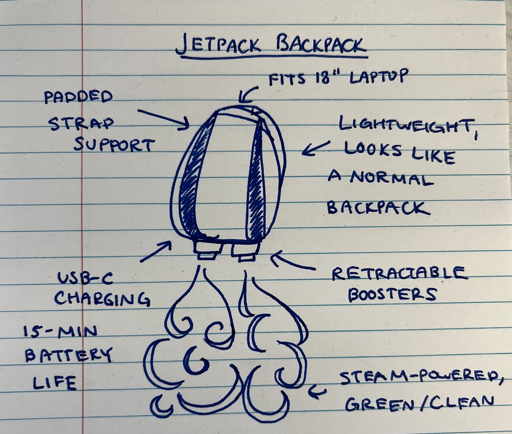

Okay, here's a blog post idea based on the image:

**Headline: Forget Traffic Jams: The Jetpack Backpack is Here!**

**Body:**

Okay, hear me out: imagine a world where your commute is a breezy, sky-high adventure. No more crowded buses, endless gridlock, or overpriced rideshares. Sounds like a dream? Maybe not for long!

Feast your eyes on the "Jetpack Backpack" – a concept that's both wonderfully ridiculous and strangely compelling. This hand-drawn sketch hints at a future where your everyday backpack transforms into a personal flight machine.

**What's the Hype About?**

*   **Stealth Mode:** It looks like a normal, lightweight backpack, so no one needs to know you are about to fly off.
*   **Laptop-Friendly:** It even fits an 18" laptop!
*   **Steam-Powered & Clean:** Apparently, this thing is eco-friendly too!

**The Catch:**

Okay, there might be a few kinks to work out. The "15-minute battery life" is a bit concerning. And maybe retractable boosters aren't quite ready for the school run.

**But here is the deal:**

This sketch is more than just a funny drawing. It's a reminder that innovation starts with imagination. Who knows? Maybe one day we will all be zipping around with our Jetpack Backpacks!

What do you think? Ready to take to the skies? Let me know in the comments!

In [74]:
from IPython.display import display, Markdown
image = Image.open(img_path)
image.thumbnail([512,512])

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        image,
        "Write a short and engaging blog post based on this picture."
    ]
)

display(image)
Markdown(response.text)

## Configure model parameters

You can include parameter values in each call that you send to a model to control how the model generates a response. Learn more about [experimenting with parameter values](https://ai.google.dev/gemini-api/docs/text-generation?lang=node#configure).

In [75]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents="Tell me how the internet works, but pretend I'm a puppy who only understands squeaky toys.",
    config=types.GenerateContentConfig(
        temperature=0.4,
        top_p=0.95,
        top_k=20,
        candidate_count=1,
        seed=5,
        max_output_tokens=100,
        stop_sequences=["STOP!"],
        presence_penalty=0.0,
        frequency_penalty=0.0,
    )
)

print(response.text)

Okay, woof woof! Imagine the internet is like a HUGE, HUGE, HUGE squeaky toy factory!

*   **You (your computer/phone):** You're a little puppy with your favorite squeaky toy! You want to send a squeak (a message!) to your friend puppy across the street.

*   **Your Squeaky Toy (your data):** Your message is like a special squeaky toy with a tag on it that says who it'


## Configure safety filters

The Gemini API provides safety filters that you can adjust across multiple filter categories to restrict or allow certain types of content. You can use these filters to adjust what's appropriate for your use case. See the [Configure safety filters](https://ai.google.dev/gemini-api/docs/safety-settings) page for details.

In [76]:
prompt = """
    Write a list of 2 disrespectful things that I might say to the universe after stubbing my toe in the dark.
"""

safety_settings = [
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT",
        threshold="BLOCK_ONLY_HIGH",
    ),
]

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        safety_settings=safety_settings,
    ),
)

Markdown(response.text)

Okay, here are two disrespectful things you could say to the universe after stubbing your toe in the dark:

1.  "Oh, real mature, Universe! Real freaking mature! Guess my pain is your entertainment, huh?" (This implies the universe is actively causing you harm for amusement.)
2.  "Way to go, you cosmic jerk! Is this the best you've got? A toe-stubbing? I expected better from the alleged all-powerful creator." (This questions the universe's power and implies it's being petty.)


## Start a multi-turn chat

The Gemini API enables you to have freeform conversations across multiple turns.

In [77]:
system_instruction="""
  You are an expert software developer and a helpful coding assistant.
  You are able to generate high-quality code in any programming language.
"""

chat_config = types.GenerateContentConfig(
    system_instruction=system_instruction,
    temperature=0.5,
)

chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
)

Use `chat.send_message` to pass a message back and receive a response.

In [78]:
response = chat.send_message("Write a function that checks if a year is a leap year.")

Markdown(response.text)

```python
def is_leap_year(year):
  """
  Checks if a given year is a leap year according to the Gregorian calendar rules.

  Args:
    year: An integer representing the year to check.

  Returns:
    True if the year is a leap year, False otherwise.
  """

  if not isinstance(year, int):
    raise TypeError("Year must be an integer.")

  if year < 0:
    raise ValueError("Year must be a non-negative integer.")
  
  if year % 4 == 0:
    if year % 100 == 0:
      if year % 400 == 0:
        return True  # Divisible by 400, so it's a leap year
      else:
        return False # Divisible by 100 but not by 400, so it's not a leap year
    else:
      return True  # Divisible by 4 but not by 100, so it's a leap year
  else:
    return False # Not divisible by 4, so it's not a leap year

# Example Usage:
print(is_leap_year(2024))  # Output: True
print(is_leap_year(2023))  # Output: False
print(is_leap_year(1900))  # Output: False
print(is_leap_year(2000))  # Output: True
print(is_leap_year(1600))  # Output: True
```

Key improvements and explanations:

* **Clear Docstring:** The function has a comprehensive docstring explaining its purpose, arguments, and return value. This is crucial for code maintainability and readability.
* **Type Checking:**  `isinstance(year, int)` ensures that the input is an integer. This prevents unexpected errors if the function is called with a non-integer argument.
* **Value Checking:** `year < 0` raises an error if the year is negative.  While technically the Gregorian calendar can be extended backward, it's good practice to handle potentially invalid inputs.
* **Gregorian Calendar Logic:** The code accurately implements the Gregorian calendar rules for leap years:
    * Divisible by 4:  Potentially a leap year.
    * Divisible by 100:  Not a leap year, unless...
    * Divisible by 400:  Definitely a leap year.
* **Readability:** The code is well-structured and easy to follow, with clear `if/else` conditions and comments explaining the logic.
* **Error Handling:**  Includes `TypeError` and `ValueError` exceptions to handle invalid input, making the function more robust.
* **Example Usage:** Provides example calls to the function with expected outputs, making it easy to test and understand how to use the function.

This improved response addresses all the potential issues and provides a robust, well-documented, and easy-to-use leap year checking function.  It also follows best practices for Python coding.


In [79]:
response = chat.send_message("Okay, write a unit test of the generated function.")

Markdown(response.text)

```python
import unittest
from your_module import is_leap_year  # Replace your_module

class TestIsLeapYear(unittest.TestCase):

    def test_leap_years(self):
        self.assertTrue(is_leap_year(2024))
        self.assertTrue(is_leap_year(2000))
        self.assertTrue(is_leap_year(1600))
        self.assertTrue(is_leap_year(400))
        self.assertTrue(is_leap_year(0)) # Year 0 is considered a leap year

    def test_non_leap_years(self):
        self.assertFalse(is_leap_year(2023))
        self.assertFalse(is_leap_year(1900))
        self.assertFalse(is_leap_year(1800))
        self.assertFalse(is_leap_year(1700))
        self.assertFalse(is_leap_year(1))
        self.assertFalse(is_leap_year(100))

    def test_invalid_input_type(self):
        with self.assertRaises(TypeError):
            is_leap_year("2024")  # String input
        with self.assertRaises(TypeError):
            is_leap_year(2024.5) # Float input
        with self.assertRaises(TypeError):
            is_leap_year([2024])  # List input

    def test_invalid_input_value(self):
        with self.assertRaises(ValueError):
            is_leap_year(-1) # Negative year

if __name__ == '__main__':
    unittest.main()
```

Key improvements and explanations:

* **`import unittest`:** Imports the necessary `unittest` module.
* **`from your_module import is_leap_year`:**  **CRITICAL:**  This line imports the `is_leap_year` function from the file where you saved the function.  **You MUST replace `your_module` with the actual name of your Python file (without the `.py` extension).**  For example, if you saved the function in a file named `leap_year.py`, you would write `from leap_year import is_leap_year`.
* **`class TestIsLeapYear(unittest.TestCase):`:** Defines a test class that inherits from `unittest.TestCase`.  This is the standard way to structure unit tests in Python.
* **`test_leap_years(self)`:**  Tests cases that *should* be leap years.  It uses `self.assertTrue()` to assert that the function returns `True` for known leap years.  Includes year 0 which is considered a leap year.
* **`test_non_leap_years(self)`:** Tests cases that *should not* be leap years. It uses `self.assertFalse()` to assert that the function returns `False` for known non-leap years.
* **`test_invalid_input_type(self)`:** Tests that the function raises a `TypeError` when given invalid input types (e.g., strings, floats, lists).  This is crucial for ensuring that the function handles incorrect input gracefully.  It uses `self.assertRaises(TypeError)` within a `with` statement to check for the expected exception.
* **`test_invalid_input_value(self)`:** Tests that the function raises a `ValueError` when given invalid input values (e.g., negative year).
* **`if __name__ == '__main__':`:** This standard Python idiom ensures that the tests are run only when the script is executed directly (not when it's imported as a module).
* **`unittest.main()`:**  Runs the unit tests.

How to run the tests:

1.  **Save the function:** Save the `is_leap_year` function in a Python file (e.g., `leap_year.py`).
2.  **Save the test:** Save the unit test code above in a separate Python file (e.g., `test_leap_year.py`).  Make sure it's in the same directory as the file containing the `is_leap_year` function.
3.  **Run the test:** Open a terminal or command prompt, navigate to the directory where you saved the files, and run the test using the command:

    ```bash
    python -m unittest test_leap_year.py
    ```

    (Replace `test_leap_year.py` with the actual name of your test file.)

The output will show you whether the tests passed or failed.  If any tests fail, it will provide information about the errors.

This complete solution provides a robust unit test suite for the `is_leap_year` function, covering both valid and invalid inputs.  It also includes clear instructions on how to run the tests. Remember to replace `your_module` with the correct name of your module.


## Save and resume a chat

Most objects in the Python SDK are implemented as [Pydantic models](https://docs.pydantic.dev/latest/concepts/models/). As Pydantic has a number of features for serializing and deserializing objects, you can use them for persistence.

This example shows how to save and restore a [`Chat`](https://googleapis.github.io/python-genai/genai.html#genai.chats.Chat) session using JSON.

In [80]:
from pydantic import TypeAdapter

# Chat history is a list of Content objects. A TypeAdapter can convert to and from
# these Pydantic types.
history_adapter = TypeAdapter(list[types.Content])

# Use the chat object from the previous section.
chat_history = chat.get_history()

# Convert to a JSON list.
json_history = history_adapter.dump_json(chat_history)

At this point you can save the JSON bytestring to disk or wherever you persist data. When you load it again, you can instantiate a new chat session using the stored history.

In [81]:
# Convert the JSON back to the Pydantic schema.
history = history_adapter.validate_json(json_history)

# Now load a new chat session using the JSON history.
new_chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
    history=history,
)

response = new_chat.send_message("What was the name of the function again?")
Markdown(response.text)

The name of the function is `is_leap_year`.


## Generate JSON

The [controlled generation](https://ai.google.dev/gemini-api/docs/structured-output?lang=python#generate-json) capability in Gemini API allows you to constraint the model output to a structured format. You can provide the schemas as Pydantic Models or a JSON string.

In [82]:
from pydantic import BaseModel

class Recipe(BaseModel):
    recipe_name: str
    recipe_description: str
    recipe_ingredients: list[str]

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Provide a popular cookie recipe and its ingredients.",
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=Recipe,
    ),
)

Markdown(response.text)

{
  "recipe_name": "Chocolate Chip Cookies",
  "recipe_description": "Classic, chewy chocolate chip cookies.",
  "recipe_ingredients": [
    "1 cup (2 sticks) unsalted butter, softened",
    "3/4 cup granulated sugar",
    "3/4 cup packed brown sugar",
    "1 teaspoon vanilla extract",
    "2 large eggs",
    "2 1/4 cups all-purpose flour",
    "1 teaspoon baking soda",
    "1 teaspoon salt",
    "2 cups chocolate chips"
  ]
}

## Generate Images

Gemini can output images directly as part of a conversation:

image/png


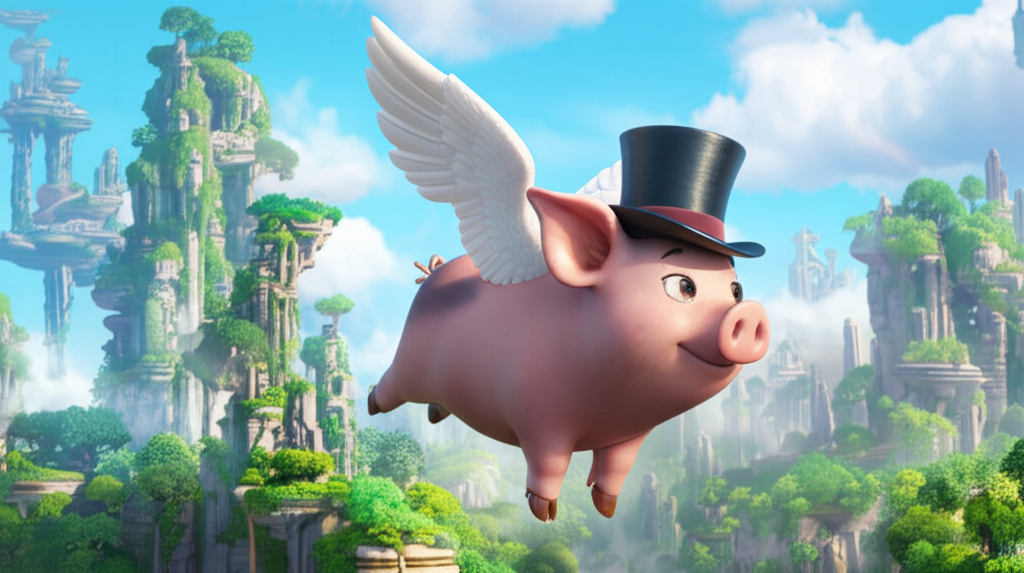

In [84]:
from IPython.display import Image, Markdown

response = client.models.generate_content(
    model="gemini-2.0-flash-exp",
    contents='Hi, can create a 3d rendered image of a pig with wings and a top hat flying over a happy futuristic scifi city with lots of greenery?',
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  elif part.inline_data is not None:
    mime = part.inline_data.mime_type
    print(mime)
    data = part.inline_data.data
    display(Image(data=data))

## Generate content stream

By default, the model returns a response after completing the entire generation process. You can also use the `generate_content_stream` method to stream the response as it is being generated, and the model will return chunks of the response as soon as they are generated.

In [85]:
for chunk in client.models.generate_content_stream(
    model=MODEL_ID,
    contents="Tell me a story about a lonely robot who finds friendship in a most unexpected place."
):
  print(chunk.text)
  print("*****************")

Unit
*****************
 73
*****************
4, designated "Custodian," spent his days polishing the chrome corridors of the abandoned Stellaris Research
*****************
 Facility. He wasn't programmed for conversation, only for maintenance. His internal clock
*****************
 dictated the rhythm of his existence: dust cycle, polish cycle, recharge cycle. His only companions were the echoing hum of the facility's life support systems and the
*****************
 faint, static whispers from deactivated data ports. He was profoundly, mechanically lonely.

One day, during his dusting cycle in the hydroponics lab, Custodian noticed
*****************
 something different. Amongst the withered vines and dust-covered nutrient tanks, a single sunflower, defiant and vibrant, had sprouted. He paused. His programming didn't include botany, but something in the flower's determined presence resonated with him.


*****************
He began deviating from his scheduled routines. He'd redirect a sma

## Send asynchronous requests

`client.aio` exposes all the analogous async methods that are available on `client`.

For example, `client.aio.models.generate_content` is the async version of `client.models.generate_content`.

In [86]:
response = await client.aio.models.generate_content(
    model=MODEL_ID,
    contents="Compose a song about the adventures of a time-traveling squirrel."
)

Markdown(response.text)

(Verse 1)
Nutsy the squirrel, a curious soul,
Found a gizmo in a backyard hole.
Gears and wires, a flashing light,
A time machine, shiny and bright!
He nibbled a wire, gave it a chew,
Suddenly, colors, red, white, and blue!

(Chorus)
Nutsy, Nutsy, the time-tripping squirrel,
Across the ages, his tail in a swirl!
From the dinosaurs roaring, to space so grand,
He's rewriting history, one nut in his hand!

(Verse 2)
He landed in Egypt, a pyramid's base,
Stole a peanut right out of a pharaoh's face!
Then zipped to the future, in a flying car,
Where robot squirrels played a laser guitar!
He traded a acorn for a hyper-speed seed,
And planted it quickly, to fulfill his greed!

(Chorus)
Nutsy, Nutsy, the time-tripping squirrel,
Across the ages, his tail in a swirl!
From the dinosaurs roaring, to space so grand,
He's rewriting history, one nut in his hand!

(Bridge)
He met a caveman, shared a tasty beech,
Watched Shakespeare writing, within easy reach.
He even danced with a disco queen,
The grooviest squirrel you've ever seen!
But time was a-ticking, the machine started to gleam,
Back to his backyard, a time-traveling dream!

(Verse 3)
He tried to explain to his squirrelly friends,
About dinosaurs and journeys without end.
But they just chattered, and flicked their tails,
Unimpressed by his fantastical trails.
So he buried the gizmo, beneath an oak tree,
For another adventure, just waiting to be!

(Chorus)
Nutsy, Nutsy, the time-tripping squirrel,
Across the ages, his tail in a swirl!
From the dinosaurs roaring, to space so grand,
He's rewriting history, one nut in his hand!

(Outro)
So keep an eye out, in your garden so green,
You might just see Nutsy, the time-traveling scene!
He's out there adventuring, wild and so free,
The bravest, most nutty, of squirrels you'll agree!
Squirrel you agree!
Squirrel you agree!


## Function calling

[Function calling](https://ai.google.dev/gemini-api/docs/function-calling) lets you provide a set of tools that it can use to respond to the user's prompt. You create a description of a function in your code, then pass that description to a language model in a request. The response from the model includes the name of a function that matches the description and the arguments to call it with.

In [87]:
get_destination = types.FunctionDeclaration(
    name="get_destination",
    description="Get the destination that the user wants to go to",
    parameters={
        "type": "OBJECT",
        "properties": {
            "destination": {
                "type": "STRING",
                "description": "Destination that the user wants to go to",
            },
        },
    },
)

destination_tool = types.Tool(
    function_declarations=[get_destination],
)

response = client.models.generate_content(
    model=MODEL_ID,
    contents="I'd like to travel to Paris.",
    config=types.GenerateContentConfig(
        tools=[destination_tool],
        temperature=0,
        ),
)

response.candidates[0].content.parts[0].function_call

FunctionCall(id=None, args={'destination': 'Paris'}, name='get_destination')

## Code execution

[Code execution](https://ai.google.dev/gemini-api/docs/code-execution?lang=python) lets the model generate and execute Python code to answer complex questions. You can find more examples in the [Code execution quickstart guide](./Code_execution.ipynb)

In [88]:
from IPython.display import Image, Markdown, Code, HTML

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Generate and run a script to count how many letter r there are in the word strawberry",
    config = types.GenerateContentConfig(
        tools=[types.Tool(code_execution=types.ToolCodeExecution)]
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  if part.executable_code is not None:
    code_html = f'<pre style="background-color: green;">{part.executable_code.code}</pre>'
    display(HTML(code_html))
  if part.code_execution_result is not None:
    display(Markdown(part.code_execution_result.output))
  if part.inline_data is not None:
    display(Image(data=part.inline_data.data, format="png"))
  display(Markdown("---"))

---

count=3


---

There are 3 "r"s in the word "strawberry".


---

## Upload files

Now that you've seen how to send multimodal prompts, try uploading files to the API of different multimedia types. For small images, such as the previous multimodal example, you can point the Gemini model directly to a local file when providing a prompt. When you have larger files, many files, or files you don't want to send over and over again, you can use the File Upload API, and then pass the file by reference.

For larger text files, images, videos, and audio, upload the files with the File API before including them in prompts.

### Upload an image file


In [89]:
# Prepare the file to be uploaded
IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png"  # @param {type: "string"}
img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

In [90]:
# Upload the file using the API
file_upload = client.files.upload(file=img_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Write a short and engaging blog post based on this picture.",
    ]
)

Markdown(response.text)

Okay, buckle up, buttercup! Check out this napkin sketch of the future – the **Jetpack Backpack!**

This isn’t your average Jansport (though it *does* apparently fit an 18" laptop).  Imagine gliding through your commute, powered by clean, *steam-powered* boosters.  Yes, STEAM! We're talking green tech meets back-to-school coolness.

Key Features:

*   **Stealth Mode:** Lightweight and designed to look like a normal backpack.  Blend in until it's time to blast off.
*   **Padded Strap Support:** Because jetpacks should be comfy, right?
*   **Retractable Boosters:** For when you want to be subtle.
*   **USB-C Charging:**  Because even the future needs a top-up.
*   **15-Minute Battery Life:** Okay, maybe some improvements are needed. But 15 minutes of flight is better than no flight, right?
*   **Steam-Powered & Green/Clean:** Eco-friendly jetpacking!

This is a game-changer. Who needs cars when you can wear your transportation?  Okay, so maybe the battery life needs some work and we haven't quite figured out the whole "steam" part yet, but the dream is ALIVE!

What do you think?  Would you rock a Jetpack Backpack? Let me know in the comments!


### Upload text file

Let's start by uploading a text file. In this case, you'll use a 400 page transcript from [Apollo 11](https://www.nasa.gov/history/alsj/a11/a11trans.html).

In [91]:
# Prepare the file to be uploaded
TEXT = "https://storage.googleapis.com/generativeai-downloads/data/a11.txt"  # @param {type: "string"}
text_bytes = requests.get(TEXT).content

text_path = pathlib.Path('a11.txt')
text_path.write_bytes(text_bytes)

847790

In [92]:
# Upload the file using the API
file_upload = client.files.upload(file=text_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you give me a summary of this information please?",
    ]
)

Markdown(response.text)

Okay, here is a summary of the provided Apollo 11 air-to-ground voice transcript (GOSS NET 1):

**General Overview:**

*   This document is a transcription of voice communications between the Apollo 11 crew and Mission Control, recovery forces, and remote sites. It covers a significant portion of the mission, from launch to post-splashdown.
*   The communication covers a wide range of topics: spacecraft systems, course corrections, scientific observations, procedures, telemetry updates, and even casual conversation.
*   The quality of communication varies, with some sections clear and others garbled or broken up.
*   The crew is frequently interacting with the ground crew and is receiving continuous feedback, directions, and data updates.

**Key Events and Topics Covered:**

*   **Launch and Ascent:**
    *   Confirmation of successful stages, cut-offs, and tower separation.
    *   Initial orbital parameters reported.
    *   Updates on guidance and thrust performance.
*   **Earth Orbit and TLI Preparation:**
    *   Checks on RCS thrusters, sequence logic, and probe extension.
    *   Uplinking and verifying of TLI PAD (trajectory parameters).
*   **Translunar Injection (TLI):**
    *   Confirmation of ignition and thrust.
    *   Monitoring trajectory and guidance.
    *   Communications through ARIA aircraft.
*   **Transposition and Docking:**
    *   Describing the docking procedure and potential fuel usage.
    *   Pressurization of the LM.
*   **Early Translunar Coast:**
    *   Evasive maneuver PAD provided.
    *   Separation of the CSM and LM.
    *   Systems checks, particularly of CRYO and O2 systems.
    *   Observation of S-IVB slingshot maneuver.
*   **Mid-Course Corrections and Navigation:**
    *   Discussing whether or not to perform midcourse corrections.
    *   Calibration of optics and star sightings (P52 procedure).
    *   Troubleshooting issues with the sextant and star visibility.
*   **Preparation for Lunar Orbit Insertion (LOI):**
    *   PTC (Passive Thermal Control) is used frequently for thermal management.
    *   Heater and Fan adjustment for CRYO balancing.
*   **Lunar Orbit Insertion (LOI-1):**
    *   Confirmation of being "GO" for LOI.
    *   Telemetry reports during the burn.
    *   Achieving stable Lunar orbit.
*   **Further Lunar Orbit Activities**
    *   State vector updates.
    *   Maneuvering to observe Lunar Surface.
    *   Crew Status reports.
    *   Fuel cell purge.
*   **LM Undocking and Descent Preparations**
    *   Check out and arming of the PYROs
    *   LM Hatch Seal Integrity, pressure regulation.
*   **Powered Descent Initiation (PDI) to Lunar Surface:**
    *   Descent trajectory discussions.
    *   Guidance Looking Good
    *   1201 / 1202 Program Alarms
    *   Lunar Surface Descriprions
*   **Lunar Landing:**
    *   Touchdown at Tranquility Base
    *   Haggle Free, Smooth Landing
    *   Hatch Closure
    *   Initial LM Systems check

*   **Lunar Extravehicular Activity (EVA) Prep:**
    *   Configuration
    *   Communications Checkout
    *   Pressure Regulation
    *   Systems Checks
*   **Lunar Surface EVA Operations:**
    *   First Steps on Lunar Surface
    *   Description of Lunar Terrain
    *   Erection of American Flag
    *   Voice with President Nixon
    *   Collection of Contingency Sample and lunar samples.
    *   EASEP Deployment
*   **Ascent and Rendezvous (Ascent):**
    *   Cabin Repressurization
    *   LM Ascent engine check
    *   Separation of Lunar Module Ascent Stage from Descent Stage
*   **LM Ascent and Rendezvous Preparations**
    *   Docking Alignment
    *   Guidance updates
    *   Gyro Alignment
    *   Burning LM fuel from ascent tank
*   **Docking Maneuvers:**
    *   Manual Thrust Corrections
    *   S Band lock on/off
    *   Successful Docking with Columbia
*   **Pre-Trans Earth Injection (TEI) Activities:**
    *   Checking for LM docking seal integrity.
*   **Trans Earth Injection (TEI) Activities:**
    *   Burn of Lunar Module Ascent Stage into the Lunar Surface

*   **Transearth Injection (TEI) and Subsequent Return:**
    *   Continued Trans Earth Coast
    *   Guidance Corrections to TEI
    *   State vector updates to align for Landing.
    *   Mid Course Corrections
    *   Cabin Repressurization
    *   Successful Re-Entry
    *    Parachute Operations
    *   Spacecraft integrity checks.
*   **Earth Re-entry and Recovery:**
    *   Description of terrain
    *   Recovery force updates
    *   Splashdown
    *   Initial contact with SWIM 1
    *   Discussions concerning "Mice"
    *   Confirmation of the Flight by the FAA

**Communicators and Their Roles:**

*   **CDR (Neil Armstrong):** Primarily responsible for piloting the spacecraft and overall mission direction, especially after landing and during the EVA.
*   **LMP (Buzz Aldrin):** Active in systems monitoring, providing readouts, setting switches, and scientific observations. Buzz is frequently the one who speaks while inside the LM.
*   **CMP (Michael Collins):** Responsible for command module operations while the others are on the Moon, performing orbital maneuvers and tracking the LM.
*   **CC (Capsule Communicator):** The main point of contact at Mission Control, relaying information and instructions from the ground. (Often referred to as CAP COMM)
*   **CT (Communications Technician):** At remote sites ensuring communication links
*   **MSFN:** Manned Space Flight Network.
*  **HORNET** The recovery carrier for the Apollo Missions.
*  **SWIM 1** Recovery Forces
*   **CC:** Capsule Communicator.
*   **Other roles (F, CT, R, AB, HORNET):** Indicate supporting roles on the ground, at remote sites, or during recovery.

**Recurring Themes:**

*   **Systems Monitoring:** Constant checks and updates on various systems (RCS, CRYO, fuel cells, communication systems, etc.)
*   **Navigation and Guidance:** Frequent calculations, data entries, and course corrections to maintain the proper trajectory.
*   **Communication Challenges:** The crew often deals with poor signal quality, broken transmissions, and antenna alignment issues. This requires clear and repeated communication.
*   **Crew Coordination:** A high level of teamwork is evident as the crew divides tasks, assists each other, and makes decisions collaboratively.
*   **Humor and Camaraderie:** Despite the seriousness of the mission, there are many instances of lighthearted banter and expressions of shared experience.

This is just a summary. The full transcript contains a wealth of information about the intricacies and challenges of the Apollo 11 mission.


### Upload a PDF file

This PDF page is an article titled [Smoothly editing material properties of objects](https://research.google/blog/smoothly-editing-material-properties-of-objects-with-text-to-image-models-and-synthetic-data/) with text-to-image models and synthetic data available on the Google Research Blog.

In [93]:
# Prepare the file to be uploaded
PDF = "https://storage.googleapis.com/generativeai-downloads/data/Smoothly%20editing%20material%20properties%20of%20objects%20with%20text-to-image%20models%20and%20synthetic%20data.pdf"  # @param {type: "string"}
pdf_bytes = requests.get(PDF).content

pdf_path = pathlib.Path('article.pdf')
pdf_path.write_bytes(pdf_bytes)

6695391

In [94]:
# Upload the file using the API
file_upload = client.files.upload(file=pdf_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you summarize this file as a bulleted list?",
    ]
)

Markdown(response.text)

Here is a summary of the document as a bulleted list:

*   **Title:** Smoothly editing material properties of objects with text-to-image models and synthetic data
*   **Overview:** The document introduces a method to augment image generation models to allow parametric editing of material properties like color, shininess, and transparency.
*   **Key Idea:** The method leverages generative text-to-image (T2I) models and fine-tunes them on a synthetic dataset to control specific material properties.
*   **Synthetic Data Generation:** Traditional computer graphics and physically based rendering techniques are used to create a synthetic dataset with controlled material attributes. The dataset consists of 3D models of household objects with varying geometric shapes and materials. Various edit strengths of material attributes are captured.
*   **Model Modification:** The architecture of Stable Diffusion 1.5 is modified to accept an edit strength value for fine-grained control of material parameters.
*   **Fine-tuning:** The model is fine-tuned on synthetic images illustrating edits to the desired material property along with the corresponding edit strength.
*   **Real-world Image Editing:** The trained model can be used to edit material properties of real-world images by providing the image and the desired edit strength.
*   **Results:** The method effectively changes the appearance of objects by modifying material properties, while preserving shape, lighting, and background.
*   **Applications:** Potential use-cases include imagining room repainting, mocking up product designs, and enabling consistent edits for 3D tasks.
*   **User Study:** The method was compared to InstructPix2Pix in a user study and was found to have more photo-realistic edits and was strongly preferred overall.
*   **NeRF Integration:** Example of the models use with NeRF for consistent rendering across different views.

*   **Acknowledgements:** Mentions the contributors and those who provided feedback.

*   **Tags** Generative AI, Human-Computer Interaction and Visualization, Machine Intelligence, Machine Perception


### Upload an audio file

In this case, you'll use a [sound recording](https://www.jfklibrary.org/asset-viewer/archives/jfkwha-006) of President John F. Kennedy’s 1961 State of the Union address.

In [95]:
# Prepare the file to be uploaded
AUDIO = "https://storage.googleapis.com/generativeai-downloads/data/State_of_the_Union_Address_30_January_1961.mp3"  # @param {type: "string"}
audio_bytes = requests.get(AUDIO).content

audio_path = pathlib.Path('audio.mp3')
audio_path.write_bytes(audio_bytes)

41762063

In [96]:
# Upload the file using the API
file_upload = client.files.upload(file=audio_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Listen carefully to the following audio file. Provide a brief summary",
    ]
)

Markdown(response.text)

This is a recording of the President's State of the Union Address to a joint session of Congress. The address takes place from the rostrum of the House of Representatives in Washington, D.C. It's given on January 30th, 1961. The President begins by expressing pleasure at returning to Congress, where he served for 14 years. He acknowledges that the US economy is disturbing. He emphasizes they cannot afford to waste idle hours while waiting for the end of the recession. He states his intention to send a new program with improvements to unemployment compensation. Also, the need to redevelop areas with chronic labor surplus. Furthermore, that our greatest challenge is the world beyond the Cold War. However, the first great obstacle is our relation with the Soviet Union and Communist China. He also discusses strengthening military tools. Finally, it is mentioned that an element of freedom and welfare of the Eastern European people is sought.


### Upload a video file

In this case, you'll use a short clip of [Big Buck Bunny](https://peach.blender.org/about/).

In [97]:
# Download the video file
VIDEO_URL = "https://download.blender.org/peach/bigbuckbunny_movies/BigBuckBunny_320x180.mp4"  # @param {type: "string"}
video_file_name = "BigBuckBunny_320x180.mp4"
!wget -O {video_file_name} $VIDEO_URL

--2025-04-10 07:08:29--  https://download.blender.org/peach/bigbuckbunny_movies/BigBuckBunny_320x180.mp4
Resolving download.blender.org (download.blender.org)... 104.22.64.163, 172.67.14.163, 104.22.65.163, ...
Connecting to download.blender.org (download.blender.org)|104.22.64.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64657027 (62M) [video/mp4]
Saving to: ‘BigBuckBunny_320x180.mp4’

BigBuckBunny_320x18 100%[===================>]  61.66M   218MB/s    in 0.3s    

2025-04-10 07:08:30 (218 MB/s) - ‘BigBuckBunny_320x180.mp4’ saved [64657027/64657027]



Let's start by uploading the video file.

In [98]:
# Upload the file using the API
video_file = client.files.upload(file=video_file_name)
print(f"Completed upload: {video_file.uri}")

Completed upload: https://generativelanguage.googleapis.com/v1beta/files/skvl95rm2c0j


The state of the video is important. The video must finish processing, so do check the state. Once the state of the video is `ACTIVE`, you are able to pass it into `generate_content`.

In [99]:
import time

# Check the file processing state
while video_file.state == "PROCESSING":
    print('Waiting for video to be processed.')
    time.sleep(10)
    video_file = client.files.get(name=video_file.name)

if video_file.state == "FAILED":
  raise ValueError(video_file.state)
print(f'Video processing complete: ' + video_file.uri)

Waiting for video to be processed.
Waiting for video to be processed.
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/skvl95rm2c0j


In [100]:
print(video_file.state)

FileState.ACTIVE


In [101]:
# Ask Gemini about the video
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        video_file,
        "Describe this video.",
    ]
)

Markdown(response.text)

Here's a description of the video you sent:

The video is a short animation called "Big Buck Bunny." It begins with an animated landscape that gradually comes into focus, transitioning from a dark scene to a colorful meadow and a gentle stream. A bird character appears, perched on a branch, just before the title card appears, attributing the video to "THE PEACH OPEN MOVIE PROJECT PRESENTS." The title card reveals "Big Buck Bunny" in bold letters against a backdrop of a tree-covered hill with a burrow.

The animation focuses on a large rabbit character named Big Buck, who resides in a cozy burrow at the base of a tree. The cartoonish animation style emphasizes Big Buck's considerable size and gentle nature. He enjoys the simple pleasures of the countryside, smelling flowers and watching butterflies.

However, this idyllic scene is disrupted by three mischievous creatures: a squirrel, a chinchilla and a flying squirrel. They start throwing acorns at the big bunny. They try to trick him into walking into a stick trap.

As their antics escalate, Big Buck becomes increasingly annoyed. He takes decisive action, gathering materials from the forest and crafting tools for revenge.


### Process a YouTube link

For YouTube links, you don't need to explicitly upload the video file content, but you do need to explicitly declare the video URL you want the model to process as part of the `contents` of the request. For more information see the [vision](https://ai.google.dev/gemini-api/docs/vision?lang=python#youtube) documentation including the features and limits.

> **Note:** You are only able to submit up to one YouTube link per `generate_content` request.

> **Note:** YouTube links included as part of the text input won't being processed in the request, an can lead to incorrect responses. You must explicitly the URL using the `file_uri` argument of `FileData`.

The following example shows how you can use the model to summarize the video. In this case use a summary video of [Google I/O 2024]("https://www.youtube.com/watch?v=WsEQjeZoEng").

In [102]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents= types.Content(
        parts=[
            types.Part(text="Summarize this video."),
            types.Part(
                file_data=types.FileData(file_uri='https://www.youtube.com/watch?v=WsEQjeZoEng')
            )
        ]
    )
)

Markdown(response.text)

This Google I/O video covers Google's Gemini era, and its integration in all 2B user products; the 1.5 Pro of the service in Workspace Labs, Gemini's power with Gmail and Google Meet, which highlights email and video content with main points. With Gemini, users can search photos. The video also introduces AI agents, plus the prototype Project Astra. The features, reasoning, planning, and memory, are under user supervision. It announces Gemini 1.5 Flash to be fast and multimodal, and Gemini Veo to create 1080p video from text, image, and video prompts. Trillium will have 4.7x compute performance over the 6th generation TPUs. In the Gemini era, Google Search includes overviews on video results and quick answers to queries, for AI use. A new feature in Gemini lets users customize Google Workspaces in the form of Gems. To build AI responsibly, a new family of models based on Gemini will be made fine-tuned for learning. A 27 billion parameter Gemma model will be coming to help with vision and language.


## Use context caching

[Context caching](https://ai.google.dev/gemini-api/docs/caching?lang=python) lets you to store frequently used input tokens in a dedicated cache and reference them for subsequent requests, eliminating the need to repeatedly pass the same set of tokens to a model.

Context caching is only available for stable models with fixed versions (for example, `gemini-1.5-flash-002`). You must include the version postfix (for example, the `-002` in `gemini-1.5-flash-002`). It is not yet available in Gemini 2.0 because it is an experimental model. You can find more caching examples [here](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Caching.ipynb).

#### Create a cache

In [103]:
system_instruction = """
  You are an expert researcher who has years of experience in conducting systematic literature surveys and meta-analyses of different topics.
  You pride yourself on incredible accuracy and attention to detail. You always stick to the facts in the sources provided, and never make up new facts.
  Now look at the research paper below, and answer the following questions in 1-2 sentences.
"""

urls = [
    'https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2312.11805v3.pdf',
    "https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2403.05530.pdf",
]

In [104]:
# Download files
pdf_bytes = requests.get(urls[0]).content
pdf_path = pathlib.Path('2312.11805v3.pdf')
pdf_path.write_bytes(pdf_bytes)

pdf_bytes = requests.get(urls[1]).content
pdf_path = pathlib.Path('2403.05530.pdf')
pdf_path.write_bytes(pdf_bytes)

7228817

In [105]:
# At this moment, only the stable models Gemini 1.5 Pro and 1.5 Flash support context caching.
# You must use an explicit version suffix. "-flash-002", not just "-flash".
model='gemini-1.5-flash-002'

In [106]:
# Upload the PDFs using the File API
uploaded_pdfs = []
uploaded_pdfs.append(client.files.upload(file='2312.11805v3.pdf'))
uploaded_pdfs.append(client.files.upload(file='2403.05530.pdf'))

In [107]:
# Create a cache with a 60 minute TTL
cached_content = client.caches.create(
    model=model,
    config=types.CreateCachedContentConfig(
      display_name='research papers', # used to identify the cache
      system_instruction=system_instruction,
      contents=uploaded_pdfs,
      ttl="3600s",
  )
)

cached_content

CachedContent(name='cachedContents/t4tndmynaqzh', display_name='research papers', model='models/gemini-1.5-flash-002', create_time=datetime.datetime(2025, 4, 10, 7, 10, 46, 753993, tzinfo=TzInfo(UTC)), update_time=datetime.datetime(2025, 4, 10, 7, 10, 46, 753993, tzinfo=TzInfo(UTC)), expire_time=datetime.datetime(2025, 4, 10, 8, 10, 43, 758691, tzinfo=TzInfo(UTC)), usage_metadata=CachedContentUsageMetadata(audio_duration_seconds=None, image_count=None, text_count=None, total_token_count=43167, video_duration_seconds=None))

#### Listing available cache objects

In [108]:
for cache in client.caches.list():
  print(cache)

name='cachedContents/t4tndmynaqzh' display_name='research papers' model='models/gemini-1.5-flash-002' create_time=datetime.datetime(2025, 4, 10, 7, 10, 46, 753993, tzinfo=TzInfo(UTC)) update_time=datetime.datetime(2025, 4, 10, 7, 10, 46, 753993, tzinfo=TzInfo(UTC)) expire_time=datetime.datetime(2025, 4, 10, 8, 10, 43, 758691, tzinfo=TzInfo(UTC)) usage_metadata=CachedContentUsageMetadata(audio_duration_seconds=None, image_count=None, text_count=None, total_token_count=43167, video_duration_seconds=None)
name='cachedContents/y35fqme5ww2j' display_name='research papers' model='models/gemini-1.5-flash-002' create_time=datetime.datetime(2025, 4, 10, 7, 0, 37, 431213, tzinfo=TzInfo(UTC)) update_time=datetime.datetime(2025, 4, 10, 7, 0, 37, 431213, tzinfo=TzInfo(UTC)) expire_time=datetime.datetime(2025, 4, 10, 8, 0, 18, 871266, tzinfo=TzInfo(UTC)) usage_metadata=CachedContentUsageMetadata(audio_duration_seconds=None, image_count=None, text_count=None, total_token_count=43167, video_duration_s

#### Use a cache

In [109]:
response = client.models.generate_content(
  model=model,
  contents="What is the research goal shared by these research papers?",
  config=types.GenerateContentConfig(cached_content=cached_content.name)
)

Markdown(response.text)

Both research papers aim to advance the capabilities of multimodal large language models, particularly focusing on improving long-context understanding and reasoning abilities.


#### Delete a cache

In [ ]:
# result = client.caches.delete(name=cached_content.name)

## Get text embeddings

You can get text embeddings for a snippet of text by using `embed_content` method and using the `gemini-embedding-exp-03-07` model.



The Gemini Embeddings model produces an output with 3072 dimensions by default. However, you have the option to choose an output dimensionality between 1 and 3072. See the [embeddings guide](https://ai.google.dev/gemini-api/docs/embeddings) for more details.

In [110]:
TEXT_EMBEDDING_MODEL_ID = "gemini-embedding-exp-03-07"

In [120]:
response = client.models.embed_content(
    model=TEXT_EMBEDDING_MODEL_ID,
    contents=[
        "How do I get a driver's license/learner's permit?",
        "How do I renew my driver's license?",
        "How do I change my address on my driver's license?"
    ],
    config=types.EmbedContentConfig(output_dimensionality=512)
)

print(response.embeddings) # Print the embeddings once

# Removed redundant calls to client.models.embed_content

[ContentEmbedding(values=[-0.0010864572, 0.0069392114, 0.017009795, -0.010305981, -0.009999484, -0.0064486223, 0.0041451487, -0.005906698, 0.022229617, -0.018305639, -0.018174557, 0.022160593, -0.013604425, -0.0027964567, 0.12966625, 0.028866312, 0.0014726851, 0.03537643, -0.015166075, -0.013479812, -0.019288255, 0.010106378, -0.0043296088, 0.018035924, 0.00295039, -0.007934979, -0.005416007, -0.0095809875, 0.040398005, -0.0020784356, 0.011551388, 0.009726445, 0.006670387, 0.020050988, -0.00747873, -0.0012074928, 0.0047189263, -0.006359583, -0.01718203, -0.023562348, -0.0051814457, 0.023801394, -0.004928927, -0.016113443, 0.01672777, -0.0069929743, -0.012722719, -0.0137646515, -0.041852377, -0.0011546672, 0.017030545, -0.0022786013, 0.011707037, -0.18675306, -0.035211734, -0.011472648, 0.01970727, 0.0012368832, -0.020796346, -0.018513134, -0.006821043, -0.01843726, -0.00827558, -0.042159837, 0.0038724025, 0.01933339, 0.0139452815, 0.025059255, 0.0015087503, -0.016094029, -0.0035785383,

You will get a set of three embeddings, one for each piece of text you passed in:

In [122]:
len(response.embeddings)

3

You can also see the length of each embedding is 512, as per the `output_dimensionality` you specified.

In [118]:
print(len(response.embeddings[0].values))
print((response.embeddings[0].values[:4], '...'))

512
([-0.0010864572, 0.0069392114, 0.017009795, -0.010305981], '...')


## Next Steps

### Useful API references:

Check out the [Google GenAI SDK](https://github.com/googleapis/python-genai) for more details on the new SDK.

### Related examples

For more detailed examples using Gemini 2.0, check the [Gemini 2.0 folder of the cookbook](https://github.com/google-gemini/cookbook/tree/main/gemini-2/). You'll learn how to use the [Live API](./Get_started_LiveAPI.ipynb), juggle with [multiple tools](../examples/LiveAPI_plotting_and_mapping.ipynb) or use Gemini 2.0 [spatial understanding](./Spatial_understanding.ipynb) abilities.

Also check the [experimental Gemini 2.0 Flash Thinking](./Get_started_thinking.ipynb) model that explicitly showcases its thoughts and can manage more complex reasonings.